# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Importing Dataset

In [3]:
# Importing Dataset from Google Drive
dataset_path = 'datasets/finalProjectDataset.csv'
data = pd.read_csv(dataset_path)

print(data.head())

   RecordID         AQI        PM10       PM2_5         NO2        SO2  \
0         1  187.270059  295.853039   13.038560    6.639263  66.161150   
1         2  475.357153  246.254703    9.984497   16.318326  90.499523   
2         3  365.996971   84.443191   23.111340   96.317811  17.875850   
3         4  299.329242   21.020609   14.273403   81.234403  48.323616   
4         5   78.009320   16.987667  152.111623  121.235461  90.866167   

           O3  Temperature   Humidity  WindSpeed  RespiratoryCases  \
0   54.624280     5.150335  84.424344   6.137755                 7   
1  169.621728     1.543378  46.851415   4.521422                10   
2    9.006794     1.169483  17.806977  11.157384                13   
3   93.161033    21.925276  99.473373  15.302500                 8   
4  241.795138     9.217517  24.906837  14.534733                 9   

   CardiovascularCases  HospitalAdmissions  HealthImpactScore  \
0                    5                   1          97.244041   
1   

# Dataset Exploration

In [7]:
print("\nDataset Information:")
data.info()

missing_values = data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
if not missing_columns.empty:
    print("\nColumns with missing values and their counts:")
    print(missing_columns)
else:
    print("\nNo missing values in the dataset.")

print("\nStatistical summary for numerical columns:")
print(data.describe())

categorical_columns = data.select_dtypes(include=['object']).columns
if not categorical_columns.empty:
    print("\nUnique value counts for categorical columns:")
    for col in categorical_columns:
        print(f"\n'{col}' column:")
        print(data[col].value_counts())
else:
    print("\nNo categorical columns found in the dataset.")

print("\nCount occurrences in HealthImpactClass column:")
print(data['HealthImpactClass'].value_counts())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), 

Data Cleaning and Preprocessing

In [4]:
print("Statistical summary for numerical columns:")
print(data.describe())

# IQR method for detecting outliers
# Outliers: values outside 1.5 * IQR from the quartiles
numerical_columns = data.select_dtypes(include=[np.number]).columns
outliers = {}

for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers[col] = data[(data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))][col]

print("\nDetected Outliers:")
for col, outlier_values in outliers.items():
    print(f"{col}: {outlier_values.values}")

# Encoding categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    unique_values = data[col].unique()
    mapping = {value: idx for idx, value in enumerate(unique_values)}
    data[col] = data[col].map(mapping)
    print(f"\nEncoding for '{col}': {mapping}")

print("\nPreprocessed dataset preview:")
print(data.head())


Statistical summary for numerical columns:
          RecordID          AQI         PM10        PM2_5          NO2  \
count  5811.000000  5811.000000  5811.000000  5811.000000  5811.000000   
mean   2906.000000   248.438476   148.654997   100.223714   102.293445   
std    1677.635538   144.777638    85.698500    58.096612    57.713175   
min       1.000000     0.005817     0.015848     0.031549     0.009625   
25%    1453.500000   122.951293    75.374954    49.435171    53.538538   
50%    2906.000000   249.127841   147.634997   100.506337   102.987736   
75%    4358.500000   373.630668   222.436759   151.340260   151.658516   
max    5811.000000   499.858837   299.901962   199.984965   199.980195   

               SO2           O3  Temperature     Humidity    WindSpeed  \
count  5811.000000  5811.000000  5811.000000  5811.000000  5811.000000   
mean     49.456838   149.312431    14.975500    54.776853     9.989177   
std      28.530329    86.534240    14.483067    26.020786     5.7769

# EDA


Correlation of Numerical Features with Health Impact Class:
HealthImpactClass      1.000000
RecordID               0.198229
HospitalAdmissions     0.014873
WindSpeed              0.005999
Temperature            0.005969
CardiovascularCases    0.001848
Humidity              -0.006715
SO2                   -0.008364
RespiratoryCases      -0.008536
NO2                   -0.090387
PM10                  -0.108271
O3                    -0.110093
PM2_5                 -0.152407
AQI                   -0.348106
HealthImpactScore     -0.655611
Name: HealthImpactClass, dtype: float64


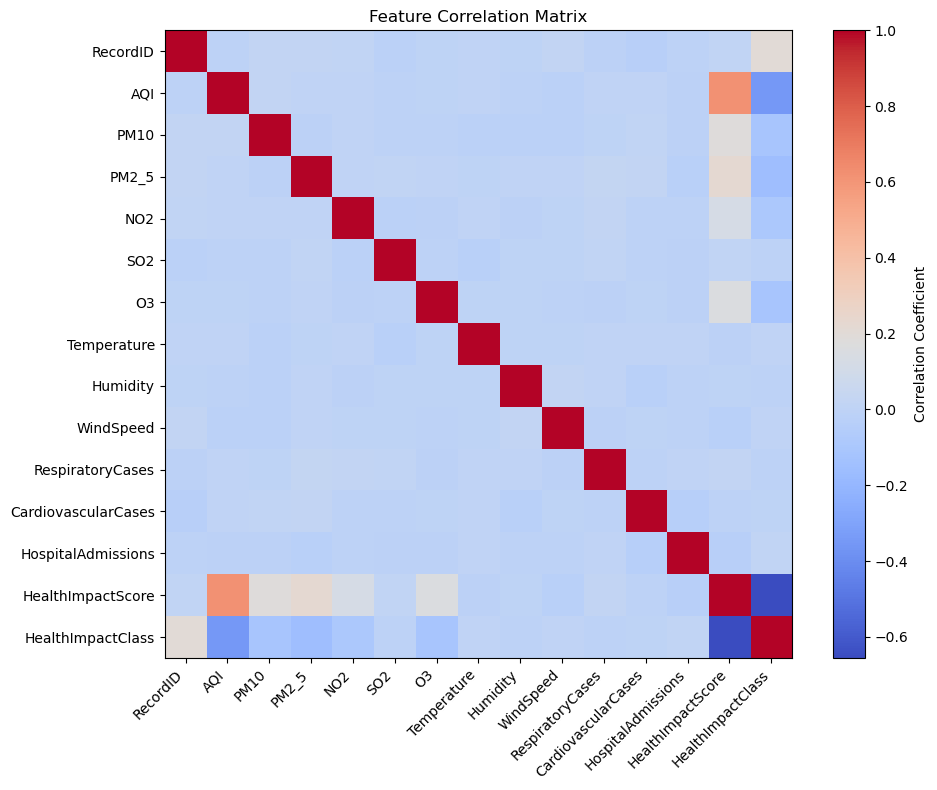

In [5]:
# relationship of features with the target variable, 'HealthImpactClass'
if 'HealthImpactClass' in data.columns:

    # Check if the target variable is categorical
    if data['HealthImpactClass'].dtype == 'object':
        print("\nMean of Features Grouped by Health Impact Class:")
        grouped_means = data.groupby('HealthImpactClass').mean()
        print(grouped_means)
    else:
        print("\nCorrelation of Numerical Features with Health Impact Class:")

        # Compute correlations if the target variable is numeric
        target_correlations = data.corr()['HealthImpactClass'].sort_values(ascending=False)
        print(target_correlations)
else:
    print("The target variable 'HealthImpactClass' is not present in the dataset.")

feature_correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
plt.imshow(feature_correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label="Correlation Coefficient")

plt.xticks(
    range(len(feature_correlation_matrix.columns)),
    feature_correlation_matrix.columns,
    rotation=45,
    ha="right"
)
plt.yticks(
    range(len(feature_correlation_matrix.columns)),
    feature_correlation_matrix.columns
)

plt.title("Feature Correlation Matrix")
plt.tight_layout()  # Ensure labels don't overlap
plt.show()


### Identify and Remove Highly Correlated Features

In [6]:
correlation_threshold = 0.9

correlation_matrix = data.corr()

highly_correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        # If the absolute correlation between two features is above the threshold
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            feature_name = correlation_matrix.columns[i]
            highly_correlated_features.add(feature_name)


data_reduced = data.drop(columns=highly_correlated_features)

print("\nRemaining Features After Removing Highly Correlated Ones:")
print(data_reduced.columns.tolist())
print(f"\nRemoved {len(highly_correlated_features)} highly correlated features: {highly_correlated_features}")



Remaining Features After Removing Highly Correlated Ones:
['RecordID', 'AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases', 'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass']

Removed 0 highly correlated features: set()


Feature Engineering

In [7]:
print("Columns in dataset:", data.columns)

# Creating a new feature: PM2.5 to PM10 ratio
if 'PM2_5' in data.columns and 'PM10' in data.columns:
    data['PM2_5_PM10_ratio'] = data['PM2_5'] / data['PM10']
    # Handle infinite or NaN values that might arise from division by zero
    data['PM2_5_PM10_ratio'] = data['PM2_5_PM10_ratio'].replace([np.inf, -np.inf], np.nan)
    data['PM2_5_PM10_ratio'] = data['PM2_5_PM10_ratio'].fillna(0)  # Replace NaN with 0
    print("Feature 'PM2_5_PM10_ratio' created.")
else:
    print("Columns 'PM2_5' and/or 'PM10' not found. Skipping 'PM2_5_PM10_ratio'.")

# Creating a feature interaction between temperature and humidity
if 'Temperature' in data.columns and 'Humidity' in data.columns:
    data['temp_humidity_interaction'] = data['Temperature'] * data['Humidity']
    print("Feature 'temp_humidity_interaction' created.")
else:
    print("Columns 'temperature' and/or 'humidity' not found. Skipping 'temp_humidity_interaction'.")

# Creating a new feature: normalized AQI
if 'AQI' in data.columns:
    max_aqi = data['AQI'].max()
    data['normalized_AQI'] = data['AQI'] / max_aqi  # Normalize by dividing by the max value
    print("Feature 'normalized_AQI' created.")
else:
    print("Column 'AQI' not found. Skipping 'normalized_AQI'.")

new_features = [feature for feature in ['PM2_5_PM10_ratio', 'temp_humidity_interaction', 'normalized_AQI'] if feature in data.columns]
print("\nNew features added:")
print(data[new_features].head())


Columns in dataset: Index(['RecordID', 'AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature',
       'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases',
       'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass'],
      dtype='object')
Feature 'PM2_5_PM10_ratio' created.
Feature 'temp_humidity_interaction' created.
Feature 'normalized_AQI' created.

New features added:
   PM2_5_PM10_ratio  temp_humidity_interaction  normalized_AQI
0          0.044071                 434.813655        0.374646
1          0.040545                  72.309456        0.950983
2          0.273691                  20.824965        0.732201
3          0.679019                2180.981188        0.598828
4          8.954238                 229.579185        0.156063


HealthImpactClass            1.000000
RecordID                     0.198229
HospitalAdmissions           0.014873
WindSpeed                    0.005999
Temperature                  0.005969
CardiovascularCases          0.001848
PM2_5_PM10_ratio             0.000221
temp_humidity_interaction   -0.002247
Humidity                    -0.006715
SO2                         -0.008364
RespiratoryCases            -0.008536
NO2                         -0.090387
PM10                        -0.108271
O3                          -0.110093
PM2_5                       -0.152407
normalized_AQI              -0.348106
AQI                         -0.348106
HealthImpactScore           -0.655611
Name: HealthImpactClass, dtype: float64


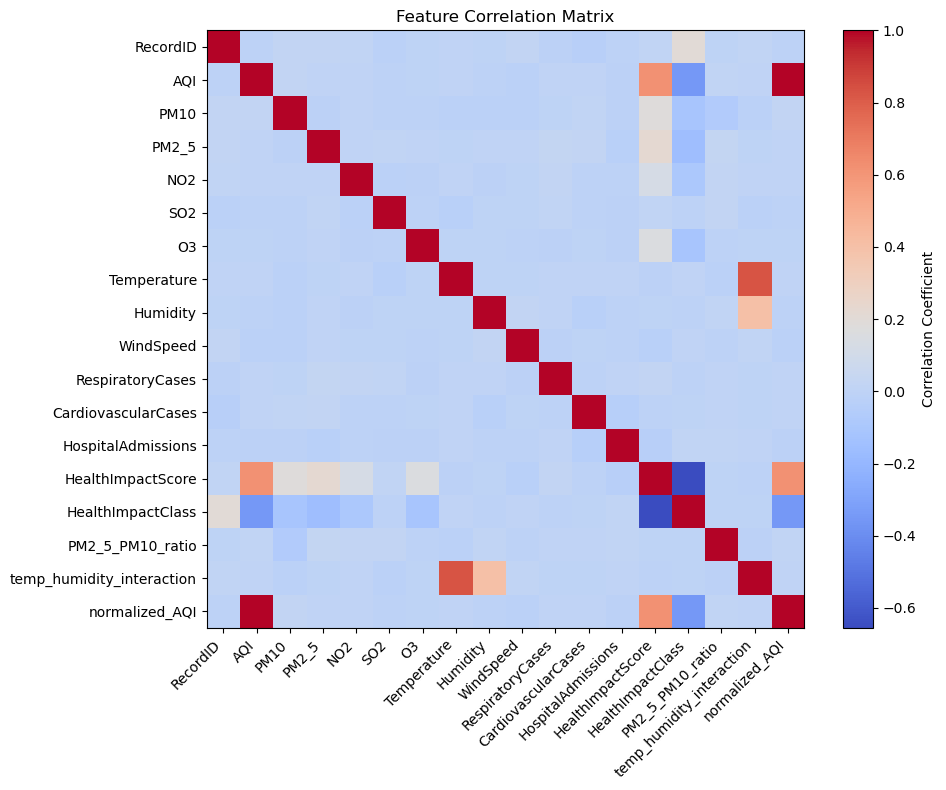

In [9]:
target_correlations = data.corr()['HealthImpactClass'].sort_values(ascending=False)
print(target_correlations)

feature_correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
plt.imshow(feature_correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label="Correlation Coefficient")

plt.xticks(
    range(len(feature_correlation_matrix.columns)),
    feature_correlation_matrix.columns,
    rotation=45,
    ha="right"
)
plt.yticks(
    range(len(feature_correlation_matrix.columns)),
    feature_correlation_matrix.columns
)

plt.title("Feature Correlation Matrix")
plt.tight_layout()  # Ensure labels don't overlap
plt.show()

## Encoding Categorical Variables

In [10]:
# Encoding Categorical Variables
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nCategorical Columns Found:", categorical_columns.tolist())
data_encoded = pd.DataFrame()
if len(categorical_columns) > 0:
    data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
    print("\nData after Encoding Categorical Variables:")
    print(data_encoded.head())
else:
    print("No categorical columns to encode.")

# data_encoded.columns
print("Columns in dataset:", data_encoded.columns)


Categorical Columns Found: []
No categorical columns to encode.
Columns in dataset: RangeIndex(start=0, stop=0, step=1)


## Feature Scaling

In [11]:
# After encoding categorical columns, apply Min-Max scaling to all features
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data_scaled = data.copy()

for col in numerical_columns:
    min_val = data_scaled[col].min()
    max_val = data_scaled[col].max()
    if max_val != min_val:
        data_scaled[col] = (data_scaled[col] - min_val) / (max_val - min_val)
    else:
        data_scaled[col] = 0

print("\nData after Min-Max Scaling:")
print(data_scaled.head())



Data after Min-Max Scaling:
   RecordID       AQI      PM10     PM2_5       NO2       SO2        O3  \
0  0.000000  0.374639  0.986498  0.065050  0.033153  0.661776  0.182115   
1  0.000172  0.950982  0.821108  0.049776  0.081556  0.905260  0.565522   
2  0.000344  0.732198  0.281531  0.115426  0.481612  0.178722  0.030024   
3  0.000516  0.598823  0.070042  0.071226  0.406184  0.483326  0.310598   
4  0.000688  0.156053  0.056594  0.760578  0.606218  0.908928  0.806153   

   Temperature  Humidity  WindSpeed  RespiratoryCases  CardiovascularCases  \
0     0.303103  0.826957   0.306828          0.272727             0.357143   
1     0.230898  0.409462   0.226000          0.409091             0.142857   
2     0.223413  0.086731   0.557847          0.545455             0.214286   
3     0.638908  0.994176   0.765133          0.318182             0.571429   
4     0.384521  0.165622   0.726739          0.363636             0.000000   

   HospitalAdmissions  HealthImpactScore  HealthImp

# Splitting Data

In [12]:
X = data_scaled.drop('HealthImpactClass', axis=1)
y = data_scaled['HealthImpactClass']

# 80:20 split with stratification to maintain the proportion of target classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)


Training set shape (X, y): (4648, 17) (4648,)
Testing set shape (X, y): (1163, 17) (1163,)


# Logistic Regression


Training with Learning Rate: 1 and Iterations: 1000
Iteration 0, Cost: 0.2439
Iteration 100, Cost: 0.1973
Iteration 200, Cost: 0.1878
Iteration 300, Cost: 0.1842
Iteration 400, Cost: 0.1824
Iteration 500, Cost: 0.1813
Iteration 600, Cost: 0.1805
Iteration 700, Cost: 0.1799
Iteration 800, Cost: 0.1794
Iteration 900, Cost: 0.1790
Iteration 999, Cost: 0.1786

Logistic Regression Test Accuracy: 82.63 %

Training with Learning Rate: 0.05 and Iterations: 500
Iteration 0, Cost: 0.6462
Iteration 100, Cost: 0.2350
Iteration 200, Cost: 0.2292
Iteration 300, Cost: 0.2259
Iteration 400, Cost: 0.2230
Iteration 499, Cost: 0.2203

Logistic Regression Test Accuracy: 82.72 %

Training with Learning Rate: 0.001 and Iterations: 2000
Iteration 0, Cost: 0.6922
Iteration 100, Cost: 0.6068
Iteration 200, Cost: 0.5406
Iteration 300, Cost: 0.4888
Iteration 400, Cost: 0.4479
Iteration 500, Cost: 0.4153
Iteration 600, Cost: 0.3889
Iteration 700, Cost: 0.3674
Iteration 800, Cost: 0.3498
Iteration 900, Cost: 0.33

ValueError: x and y must have same first dimension, but have shapes (3500,) and (1,)

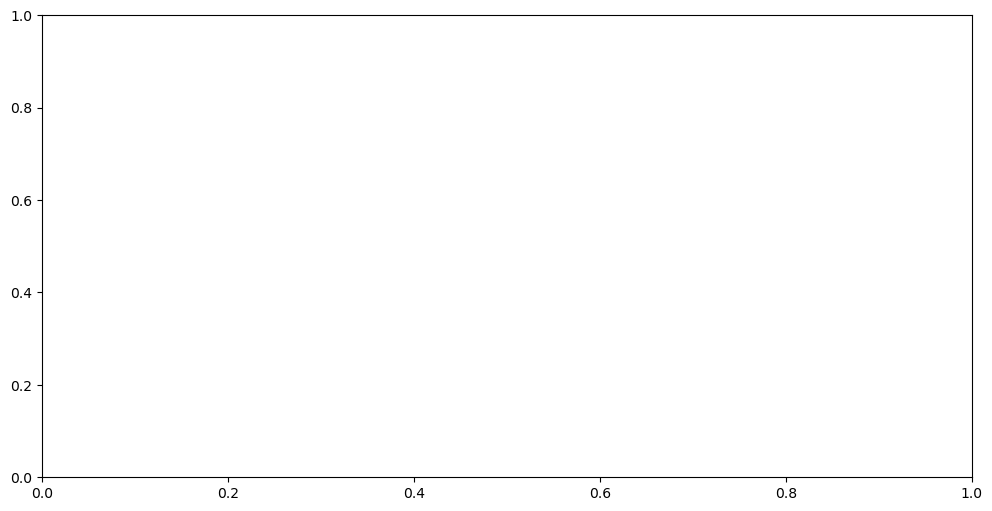

In [11]:
from sklearn.metrics import classification_report

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize_weights(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

def compute_cost(X, y, weights, bias):
    m = len(y)
    z = np.dot(X, weights) + bias
    predictions = sigmoid(z)
    predictions = np.clip(predictions, 1e-10, 1 - 1e-10)
    cost = -1 / m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

def compute_gradients(X, y, weights, bias):
    m = len(y)
    z = np.dot(X, weights) + bias
    predictions = sigmoid(z)
    dw = 1 / m * np.dot(X.T, (predictions - y))
    db = 1 / m * np.sum(predictions - y)
    return dw, db

costs = []
def optimize(X, y, weights, bias, learning_rate, iterations):
    for i in range(iterations):
        dw, db = compute_gradients(X, y, weights, bias)
        weights -= learning_rate * dw
        bias -= learning_rate * db
        cost = compute_cost(X, y, weights, bias)
        costs.append(cost)
        if i % 100 == 0 or i == iterations - 1:
            print(f"Iteration {i}, Cost: {cost:.4f}")
    return weights, bias, costs

def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    probabilities = sigmoid(z)
    predictions = (probabilities > 0.5).astype(int)
    return predictions

hyperparameters = [
    {'learning_rate': 1, 'iterations': 1000},
    {'learning_rate': 0.05, 'iterations': 500},
    {'learning_rate': 0.001, 'iterations': 2000}
]

for params in hyperparameters:
    print(f"\nTraining with Learning Rate: {params['learning_rate']} and Iterations: {params['iterations']}")

    n_features = X_train.shape[1]
    weights, bias = initialize_weights(n_features)

    weights, bias, costs = optimize(X_train, y_train, weights, bias, params['learning_rate'], params['iterations'])

    y_test_pred = predict(X_test, weights, bias)
    test_accuracy = np.mean(y_test == y_test_pred)
    print("\nLogistic Regression Test Accuracy:", round(test_accuracy * 100, 2), "%")


    # Plotting the cost curves
plt.figure(figsize=(12, 6))
for i, cost in enumerate(costs):
    plt.plot(range(len(costs)), cost, label=f'Learning Rate: {hyperparameters[i]["learning_rate"]}')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Curves for Different Learning Rates')
plt.legend()
plt.show()

# Plotting the accuracy curve
plt.figure(figsize=(12, 6))
plt.plot([params['learning_rate'] for params in hyperparameters], accuracies_all, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Learning Rates')
plt.xticks([0, 0.05, 1])
plt.show()


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# import shap

# # Define features (X) and target (y)
# X = data.drop(columns=['HealthImpactScore', 'RecordID', 'HealthImpactClass'])
# y = data['HealthImpactScore']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a Random Forest Regressor
# rf_model = RandomForestRegressor(random_state=42)
# rf_model.fit(X_train, y_train)

# # Initialize SHAP explainer
# explainer = shap.TreeExplainer(rf_model)
# shap_values = explainer.shap_values(X_train)

# # Summarize feature importance
# shap.summary_plot(shap_values, X_train)

In [ ]:
import shap
# Define a prediction function for SHAP
def predict_proba(X):
    z = np.dot(X, weights) + bias
    return sigmoid(z)  # Return probabilities

# Initialize SHAP KernelExplainer
explainer = shap.KernelExplainer(predict_proba, X_train)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)  # Static summary plot
shap.dependence_plot(0, shap_values, X_test)  # Static dependence plot


/home/mohit-marfatia/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/mohit-marfatia/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


({'R^2 Score': -0.04950670656960199, 'RMSE': 3.2650553726413962},
 {'R^2 Score': -0.04949346416888334, 'RMSE': 2.3317299900172097})

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Load and prepare the dataset
file_path = "datasets/finalProjectDataset.csv"  # Update the path if necessary
data = pd.read_csv(file_path)

# Select relevant features and target
relevant_columns = [
    "PM10", "PM2_5", "NO2", "SO2", "O3", "Temperature", "Humidity", "WindSpeed"
]
X = data[relevant_columns].values
y = data["AQI"].values

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Normalize the features
X_mean, X_std = X_poly.mean(axis=0), X_poly.std(axis=0)
X_normalized = (X_poly - X_mean) / (X_std + 1e-8)  # Add small value to prevent division by zero

y_mean, y_std = y.mean(), y.std()
y_normalized = (y - y_mean) / (y_std + 1e-8)

# Split into training and testing sets (80% train, 20% test)
split_index = int(0.8 * len(X_normalized))
X_train, X_test = X_normalized[:split_index], X_normalized[split_index:]
y_train, y_test = y_normalized[:split_index], y_normalized[split_index:]

# Define the neural network class
class NeuralNetwork4:
    def __init__(self, input_size, hidden_sizes, output_size):
        # Initialize weights and biases for a 3-layer network
        self.W1 = np.ones((input_size, hidden_sizes[0])) # np.random.randn(input_size, hidden_sizes[0]) * np.sqrt(2 / input_size)
        self.b1 = np.zeros((1, hidden_sizes[0]))
        self.W2 = np.ones((hidden_sizes[0], hidden_sizes[1])) # np.random.randn(hidden_sizes[0], hidden_sizes[1]) * np.sqrt(2 / hidden_sizes[0])
        self.b2 = np.zeros((1, hidden_sizes[1]))
        self.W3 = np.ones((hidden_sizes[1], output_size)) # np.random.randn(hidden_sizes[1], output_size) * np.sqrt(2 / hidden_sizes[1])
        self.b3 = np.zeros((1, output_size))

    def relu(self, Z):
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        return (Z > 0).astype(float)

    def forward_propagation(self, X):
        # Forward pass through the network
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)

        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.relu(self.Z2)

        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        return self.Z3  # Linear output for regression

    def compute_loss(self, Y, A3):
        m = Y.shape[0]
        loss = np.mean((A3 - Y.reshape(-1, 1)) ** 2)  # Mean Squared Error
        return loss

    def backward_propagation(self, X, Y, output, lambda_reg):
        m = X.shape[0]

        # Gradients for output layer
        dZ3 = (output - Y.reshape(-1, 1)) / m
        dW3 = np.dot(self.A2.T, dZ3) + (lambda_reg / m) * self.W3
        db3 = np.sum(dZ3, axis=0, keepdims=True)

        # Gradients for second hidden layer
        dA2 = np.dot(dZ3, self.W3.T)
        dZ2 = dA2 * self.relu_derivative(self.Z2)
        dW2 = np.dot(self.A1.T, dZ2) + (lambda_reg / m) * self.W2
        db2 = np.sum(dZ2, axis=0, keepdims=True)

        # Gradients for first hidden layer
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.relu_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) + (lambda_reg / m) * self.W1
        db1 = np.sum(dZ1, axis=0, keepdims=True)

        # Update weights and biases
        self.W3 -= learning_rate * dW3
        self.b3 -= learning_rate * db3
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X_train, y_train, learning_rate, epochs, lambda_reg):
        for epoch in range(epochs):
            # Forward propagation
            output = self.forward_propagation(X_train)

            # Compute loss
            loss = self.compute_loss(y_train, output)

            # Backward propagation
            self.backward_propagation(X_train, y_train, output, lambda_reg)

            # Logging
            if (epoch + 1) % 1000 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    def predict(self, X):
        return self.forward_propagation(X)

# Hyperparameters
input_size = X_train.shape[1]  # Number of input features
hidden_sizes = [16, 8]  # Number of neurons in the two hidden layers
output_size = 1  # Single output for regression
learning_rate = 0.008
epochs = 10000
lambda_reg = 0.01  # Regularization strength

# Initialize the network
nn = NeuralNetwork4(input_size, hidden_sizes, output_size)

# Train the model
nn.train(X_train, y_train, learning_rate, epochs, lambda_reg)

# Evaluate the model
y_pred = nn.predict(X_test).flatten()
y_pred_rescaled = y_pred * y_std + y_mean  # Rescale predictions to original scale
y_test_rescaled = y_test * y_std + y_mean  # Rescale test values to original scale

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual AQI", alpha=0.7)
plt.plot(y_pred_rescaled, label="Predicted AQI", alpha=0.7)
plt.title("Actual vs Predicted AQI")
plt.xlabel("Sample Index")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.show()

# Compute Test Loss
test_loss = np.mean((y_pred_rescaled - y_test_rescaled) ** 2)
print(f"Test Loss: {test_loss:.4f}")

# Calculate accuracy as 1 - (normalized error)
accuracy = 1 - (test_loss / (np.var(y_test_rescaled) + 1e-8))  # Prevent division by zero
print(f"Test Accuracy: {accuracy:.4f}")
